## Дипломная работа по курсу "Python для анализа данных"

Выполнила Прилукова Полина

### Описание данных
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты

### Задание

1. Загрузите файл HR.csv в pandas dataframe
1. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
1. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.
1. Рассчитайте сколько сотрудников работает в каждом департаменте.
1. Показать распределение сотрудников по зарплатам.
1. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
1. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
1. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
    - Доля сотрудников с повышением за последние 5 лет
    - Средняя степень удовлетворенности
    - Среднее количество проектов
1. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборкe
1. Загрузить jupyter notebook с решение на github и прислать ссылку

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загружаем данные в датафрейм

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Проверим наши данные. Необходимо оценить наличие пропусков и выбросов в данных и выбрать стратегию очистки данных в случае, если они есть. Пропусков в данных у нас нет, как видно из результата выполнения метода info(). Есть ли в данных выбросы, покажет дальнейший анализ. 

### 2. Рассчитаем основные статистические метрики

Посмотрим на основные статистические характеристики для числовых признаков. Колонки work_accident, left и promotion_last_5years содержат категориальные данные (наличие признака - 1, отсутствие - 0), несмотря на то, что данные в них выражены числами. Можно их оставить при расчете основных стат. характеристик (так мы сможем, например, по значению среднего оценить, содержится ли в столбце больше 0 или же 1), но больший интерес будут представлять первые 5 колонок.

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
for column in df.describe().columns:
    print(f'Метрики показателя {column}:')
    print(f'* среднее = {df.describe().loc["mean", column]}')
    print(f'* медиана = {df.describe().loc["50%", column]}')
    print(f'* мода = {df[column].mode().values[0]}')
    print(f'* минимум = {df.describe().loc["min", column]}')
    print(f'* максимум = {df.describe().loc["max", column]}')
    print(f'* стандартное отклонение = {df.describe().loc["std", column]}')
    print()
    

Метрики показателя satisfaction_level:
* среднее = 0.6128335222348166
* медиана = 0.64
* мода = 0.1
* минимум = 0.09
* максимум = 1.0
* стандартное отклонение = 0.2486306510611418

Метрики показателя last_evaluation:
* среднее = 0.7161017401159978
* медиана = 0.72
* мода = 0.55
* минимум = 0.36
* максимум = 1.0
* стандартное отклонение = 0.17116911062327592

Метрики показателя number_project:
* среднее = 3.80305353690246
* медиана = 4.0
* мода = 4
* минимум = 2.0
* максимум = 7.0
* стандартное отклонение = 1.2325923553183857

Метрики показателя average_montly_hours:
* среднее = 201.0503366891126
* медиана = 200.0
* мода = 135
* минимум = 96.0
* максимум = 310.0
* стандартное отклонение = 49.943099371284305

Метрики показателя time_spend_company:
* среднее = 3.498233215547703
* медиана = 3.0
* мода = 3
* минимум = 2.0
* максимум = 10.0
* стандартное отклонение = 1.4601362305354546

Метрики показателя Work_accident:
* среднее = 0.1446096406427095
* медиана = 0.0
* мода = 0
* минимум = 0.

Перед дальнейшим исследованием убедимся, что датасет не нуждается в дополнительной предобработке данных. Пропусков в данных у нас нет, исследуем на выбросы. Для того, чтобы визуально оценить, есть ли в датасете выбросы, можем построить боксплоты для наших числовых данных. 

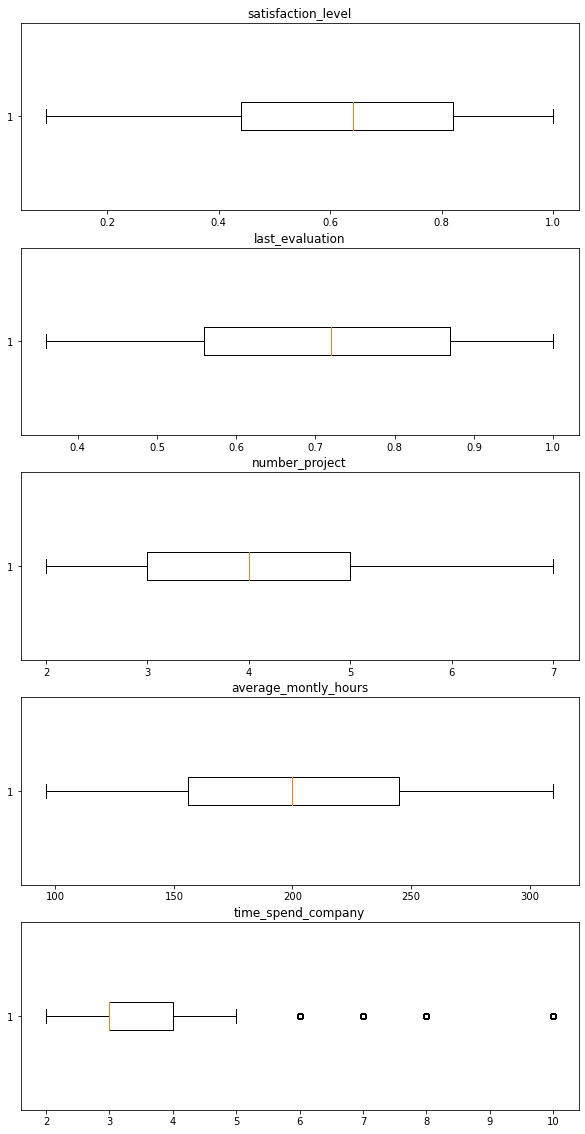

In [5]:
fig, axes = plt.subplots(5, figsize=(10, 20))
i=0
for column in df.iloc[: , :5].columns:
    axes[i].boxplot(df[column], vert=False)
    axes[i].set_title(column)
    i+=1

Получили, что выбросы (сверху) есть только в столбце time_spend_company. Но непохоже, чтобы это были ошибочные данные. time_spend_company - это стаж работы в годах. И если в среднем стаж составляет около 3 лет, то легко допустить, что в компании есть люди, проработавшие от 6 до 10 лет, например, кто-то из сотрудников, занимающих руководящие посты. Таким образом, эти данные не надо исключать из анализа.

Можно сделать вывод, что предоставленные данные не нуждаются в предварительной чистке. Можно приступать к анализу.

### 3. Рассчитаем корреляционную матрицу для количественных переменных

Строго количественными переменными в нашем датасете являются первые 5 столбцов. Рассчитаем для них коэффициенты корреляции

In [6]:
# линейная корреляция Пирсона
df.iloc[: , :5].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<AxesSubplot:>

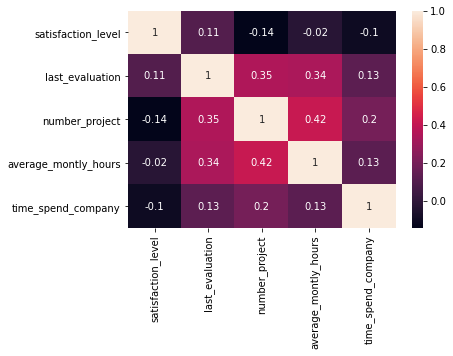

In [7]:
sns.heatmap(df.iloc[: , :5].corr(), annot=True)

In [8]:
# корреляция по Спирману
df.iloc[: , :5].corr(method = 'spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


<AxesSubplot:>

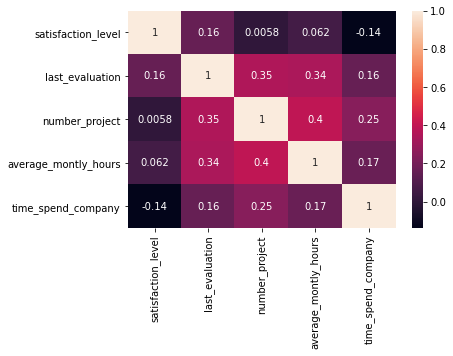

In [9]:
sns.heatmap(df.iloc[: , :5].corr(method = 'spearman'), annot=True)

После расчета корреляционной матрицы 2мя методами, можем сказать, что наиболее скорреллированными являются переменные average_monthly_hours и number_project. Они имеют наибольший коэффициент корреляции в обоих случаях. Впрочем, корреляция между ними не является сильной, скорее речь идет об умеренной положительной корреляционной связи. В целом, это ожидаемая взаимосвязь - за большее количество часов в месяц можно успеть сделать больше проектов. И наоборот, при запланированном большом количестве проектов требуется много часов для их выполнения.

Наиболее близкие к 0 значения, то есть наименее скореллированные признаки - это в 1м случае average_montly_hours и satisfaction_level (очень слабая отрицательная связь), во 2м случае - number_project и satisfaction_level (очень слабая положительная связь). Можно сказать, что это тоже логично: вне зависимости от удовлетворенности работой сотрудник обязан проводить на работе определенное количество часов и выполнять некое количество проектов.

### 4. Рассчитаем, сколько сотрудников работает в каждом департаменте.

In [10]:
for dep, count in df['department'].value_counts().items():
    print(f'В отделе {dep} {count} человек')

В отделе sales 4140 человек
В отделе technical 2720 человек
В отделе support 2229 человек
В отделе IT 1227 человек
В отделе product_mng 902 человек
В отделе marketing 858 человек
В отделе RandD 787 человек
В отделе accounting 767 человек
В отделе hr 739 человек
В отделе management 630 человек


In [11]:
# доля сотрудников в каждом отделе составляет:
df['department'].value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

### 5. Покажем распределение сотрудников по зарплатам.

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

<AxesSubplot:>

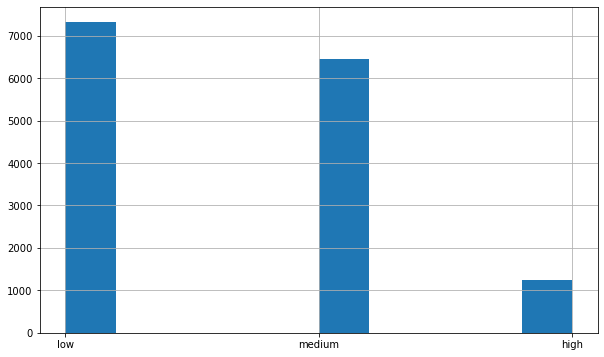

In [13]:
df.salary.hist()

### 6. Покажем распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [14]:
salary_by_deps = df.pivot_table(index='department', columns='salary', values='satisfaction_level', aggfunc='count')
salary_by_deps = salary_by_deps[['low', 'medium', 'high']]
salary_by_deps

salary,low,medium,high
department,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


<AxesSubplot:xlabel='department'>

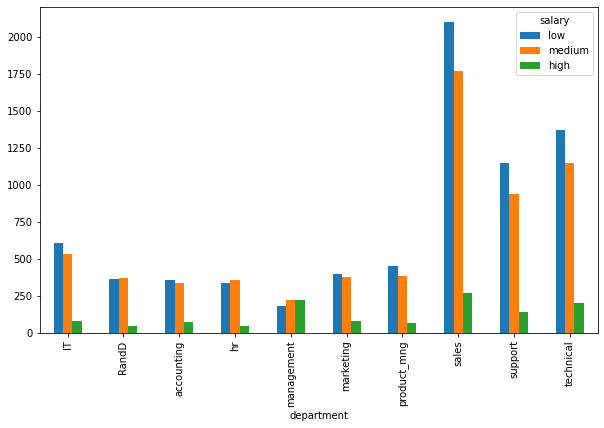

In [15]:
# распределение зарплат по отделам сводно
salary_by_deps.plot(kind='bar')

In [18]:
salary_by_deps.sort_values(by='low', ascending=False).style.bar()

salary,low,medium,high
department,,,
sales,2099,1772,269
technical,1372,1147,201
support,1146,942,141
IT,609,535,83
product_mng,451,383,68
marketing,402,376,80
RandD,364,372,51
accounting,358,335,74
hr,335,359,45


Видим, что распределение средних и низких зарплат примерно одинаковое для всех отделов. Однако высокие зарплаты распределены иначе. Их доля очевидно выше в отделе managment, что логично, т.к. большинство руководящих должностей скорее всего приписаны к этому отделу, а так же сравнительно выше в отделах Accounting (бухгалтерия) и Marketing. 

### 7. Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Рассчитаем, сколько часов в месяц в среднем отрабатывает сотрудник  свыоским окладом и сколько с низким. 

In [19]:
hours_and_salary = df.groupby('salary').agg({'average_montly_hours':['sum', 'count']})
hours_and_salary

average_montly_hours      
                        sum count
salary                           
high                 247236  1237
low                 1470491  7316
medium              1297827  6446

In [20]:
hours_and_salary.loc[:, 'hours_by_employee'] = hours_and_salary['average_montly_hours']['sum'] / hours_and_salary['average_montly_hours']['count']
hours_and_salary

average_montly_hours       hours_by_employee
                        sum count                  
salary                                             
high                 247236  1237        199.867421
low                 1470491  7316        200.996583
medium              1297827  6446        201.338349

Получили, что для сотрудников с высоким окладом среднее количество отработанных за месяц часов на одного человека составляет 199,867 часов. Для сотрудников с низким окладом аналогичный показатель составляет 200,997 часов. Это ненамного, но все же больше, чем для сотрудников с высоким окладом. 
Скорее всего исходная гипотеза неверна, но для большей обоснованности такого ответа можно провести статистический тест.  

Примем за **гипотезу Н0** утверждение, что сотрудники с высоким и низким окладами проводят на работе примерно одинаковое количество времени.  
За **гипотезу Н1** примем утверждение, что сотрудники с высоким окладом проводят на работе больше времени, чем с низким.  
Если статистический тест отвергнет нулевую гипотезу, мы сможем сказать, что исходное предположение верно.

In [36]:
# выделим из исходного датасета данные для стат. теста 
high_salary_hours = df[df.salary.str.contains('high')]['average_montly_hours']
low_salary_hours = df[df.salary.str.contains('low')]['average_montly_hours']

In [39]:
from scipy import stats 
alpha = 0.05
result = stats.ttest_ind(high_salary_hours, low_salary_hours, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


По результатам теста получили, что нулевую гипотезу на стандартном уровне значимости = 0.05 нельзя отвергнуть, т.е. нет статистически значимой разницы между количеством времени, проводимому на работе сотрудниками с разными окладами. А с учетом знака t-критерия (минус) можем сказать, что в среднем сотрудники с высоким окладам проводят меньше времени на работе.

Вывод: исходное предположение неверно, сотрудники с высоким окладам не проводят больше времени на работе, чем сотрудники с низким окладом

<AxesSubplot:xlabel='salary', ylabel='average_montly_hours'>

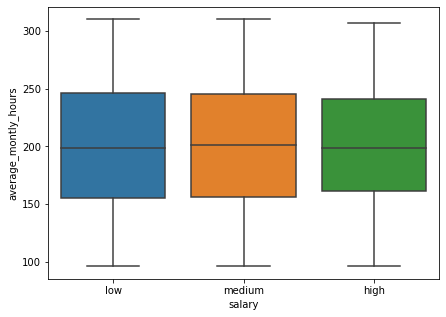

In [21]:
sns.boxplot(x=df.salary, y=df.average_montly_hours, data=df)

Визуализация подтверждает вывод. Для сотрудников со средним окладом и медианное, и максимальное количество часов в месяц больше, чем для сотрудников с высоким окладом.

### 8. Рассчитаем следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):  
 - Доля сотрудников с повышением за последние 5 лет
 - Средняя степень удовлетворенности
 - Среднее количество проектов

In [22]:
not_left = df[df['left'] == 0]
left = df[df['left'] == 1]

In [23]:
left['promotion_last_5years'].value_counts(normalize=True)

0    0.994679
1    0.005321
Name: promotion_last_5years, dtype: float64

Среди уволившихся сотрудников доля не получивших повышение **99,47%**, доля получивших повышение **0,53%**

In [24]:
not_left['promotion_last_5years'].value_counts(normalize=True)

0    0.973749
1    0.026251
Name: promotion_last_5years, dtype: float64

Среди не уволившихся сотрудников доля не получивших повышение **97,37%**, доля получивших повышение **2,63%**

In [25]:
not_left.satisfaction_level.mean()

0.666809590479516

In [26]:
left.satisfaction_level.mean()

0.44009801176140917

Среди уволившихся сотрудников средняя степень удовлетворенности **0.4401**  
Среди не уволившихся сотрудников средняя степень удовлетворенности **0.6668**  

In [27]:
not_left.number_project.mean()

3.786664333216661

In [28]:
left.number_project.mean()

3.8555026603192384

Количество проектов округлим до ближайшего целого. Получим, что и для уволившихся, и для не уволившихся сотрудников среднее количество проектов в месяц составляет почти 4 штуки

### 9. Построим модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценим качество модели на тестовой выборкe

In [29]:
lda_data = df.drop(['department', 'salary', 'left'], axis=1)
lda_target = df['left']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [90]:
X_train, X_test, y_train, y_test = train_test_split(lda_data, lda_target, test_size=0.3, random_state=42)

In [91]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [92]:
# посмотрим на разницу факта и прогноза
result = pd.DataFrame([y_test.values, y_pred]).T
result.columns = ['test_values', 'predicted_values']
result

,test_values,predicted_values
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
4495,0,0
4496,0,1
4497,0,0
4498,0,0


In [93]:
accuracy_score(y_test, y_pred)

0.7557777777777778

Точность модели получилась около 75%. Посмотрим, можем ли мы добиться улучшения точности, если изменим некоторые гиперпараметры модели. 

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import arange

In [94]:
# тестовая модель LDA
model = LinearDiscriminantAnalysis(solver='lsqr')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='accuracy', cv=cv)
results = search.fit(X_train, y_train)

print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.785
Config: {'shrinkage': 0.88}


In [95]:
lda_tuned = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.88)

In [96]:
lda_tuned.fit(X_train, y_train)
y_pred_new = lda_tuned.predict(X_test)
accuracy_score(y_test, y_pred_new)

0.7815555555555556

Изменение гиперпараметров дало небольшой прирост точности, теперь она составляет примерно 78%, т.е. новая модель немного лучше предсказывает по имеющимся данным, уволился сотрудник или нет.

### 10. Загрузим jupyter notebook с решение на github